In [17]:
from tools.preprocess import *
from sklearn.neighbors import *
from sklearn.ensemble import *
from catboost import CatBoostRegressor
from xgboost import XGBRegressor, plot_importance
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score
from tools.selector import *
pd.options.display.max_rows=400
pd.options.display.max_columns=400

In [2]:
preprocessing_parameters = {
    'drop_columns':["energy_performance_category","ghg_category"],
    'frequency_encoding':['city'],
    'quantile_encoding':[],
    'label_encoding':[],
    'target_encoding':[],
    'constant_imputation_floor':False,
    'constant_land_size':False,
    'constant_energy_performance_value':False,
    'constant_ghg_value':False,
    'constant_imputation_bedrooms':False,
    'constant_imputation_exposition':False,
    'iter_imputation':False,
    'mean_imputation':False,
    'mini_imputation':False,
    'add_polar_coordinates':True,
    'add_polar_rotation':True,
    'add_geo_pca':True,
    'add_geopopulation':False,
    'add_geopopulation_2':False,
    'add_distance_to_city_center':False, #only True when add_geopopulation is true
    'add_geo':True,
    'geodata':["index","num_train_station","num_night_club", "num_gas_station","user_ratings_total"],#  
    'add_classification_quality':False,
    'classification_threshold':0,
    'images_features':[],
    'feature_transformation':False,
    'features_interactions':False,
    'hot_encoding':True,
    'standard_scaling':False,
    'robust_scaling':True,
    'power_scaling':False,
    'target_transformation':True,
}

In [3]:
Y_train_raw=pd.read_csv('data/' + 'y_train_OXxrJt1.csv')


In [6]:
from PIL import Image
import os
import glob
import math


def concatenate_images(path_image):

    # create a list of all image file names
    image_files = glob.glob(f"{path_image}/*.jpg")

    # create an empty list to store image objects
    images = []

    # loop through the image files and open them as image objects
    for file in image_files:
        img = Image.open(file)
        images.append(img)

    # calculate the dimensions of the output image
    num_images = len(images)
    cols = math.ceil(math.sqrt(num_images))
    rows = math.ceil(num_images / cols)
    max_width = max([img.size[0] for img in images])
    max_height = max([img.size[1] for img in images])
    out_width = max_width * cols
    out_height = max_height * rows

    # create a new image object to store the concatenated image
    concatenated_image = Image.new('RGB', (out_width, out_height), (255, 255, 255))

    # loop through the images and paste them into the concatenated image
    x_offset = 0
    y_offset = 0
    for img in images:
        concatenated_image.paste(img, (x_offset, y_offset))
        x_offset += max_width
        if x_offset >= out_width:
            x_offset = 0
            y_offset += max_height
    concatenated_image.save('concatenated_image.jpg')
    return concatenated_image
# save the concatenated imag e


In [12]:
import PIL
from PIL import Image
import glob

ann = 36080449
path = f"data/reduced_images/train/ann_{ann}"
concatenate_images(path)
list_images=glob.glob(f"data/reduced_images/train/ann_{ann}/*.jpg")
print(list_images)
for image in list_images :
    image = Image.open(image)
    image.show()

['data/reduced_images/train/ann_36080449/1de5eb03047181b7ef544ce66d8e823886617430.jpg', 'data/reduced_images/train/ann_36080449/d1404476e9211e4fa351f4d77793d370f58b0922.jpg', 'data/reduced_images/train/ann_36080449/86ea8c7e30061554f30e19c196f6e45b77500d55.jpg', 'data/reduced_images/train/ann_36080449/aa0aa46065e71e83fef977dcb1cbc279b1189e14.jpg', 'data/reduced_images/train/ann_36080449/984d8ed4d5b8368728e3009f24cfbe6b18eaf1a6.jpg', 'data/reduced_images/train/ann_36080449/c7541146f6b06b76b4d4c7df0f55d8358782adad.jpg']



(eog:49249): Gtk-WARNING **: 00:03:21.811: cannot open display: 

(eog:49260): Gtk-WARNING **: 00:03:21.824: cannot open display: 

(eog:49274): Gtk-WARNING **: 00:03:21.838: cannot open display: 

(eog:49288): Gtk-WARNING **: 00:03:21.849: cannot open display: 



(eog:49302): Gtk-WARNING **: 00:03:21.861: cannot open display: 

(eog:49315): Gtk-WARNING **: 00:03:21.873: cannot open display: 


In [ ]:
Y_train

In [33]:
Y_train_raw["label"]=Y_train_raw["price"]//1000
Y_train_raw["label"]=Y_train_raw["label"].astype(np.int32)
df = Y_train_raw
print(len(Y_train_raw["label"].unique()))

1302


<Axes: >

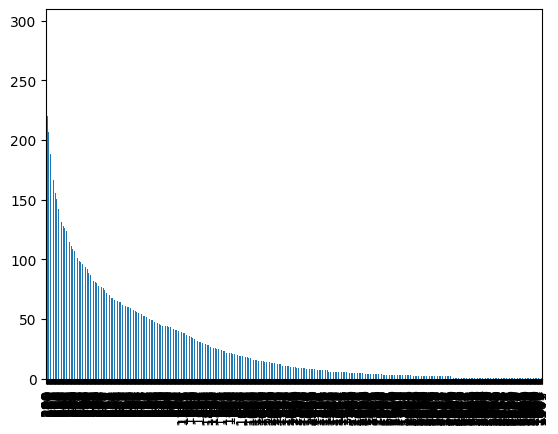

In [34]:
df.label.value_counts().plot(kind="bar")


In [ ]:
DATA_PATH='data/reduced'
class HouseDataset(torch.utils.data.Dataset):
    """
    Helper Class to create the pytorch dataset
    """

    def __init__(self, df, data_path=DATA_PATH, mode="train", transforms=None):
        super().__init__()
        self.df_data = df.labels
        self.data_path = data_path
        self.transforms = transforms
        self.mode = mode
        self.data_dir = "train_images" if mode == "train" else "test_images"

    def __len__(self):
        return len(self.df_data)

    def __getitem__(self, index):
        img_name, label = self.df_data[index]
        img_path = os.path.join(self.data_path, self.data_dir, img_name)
        img = Image.open(img_path).convert("RGB")

        if self.transforms is not None:
            image = self.transforms(img)

        return image, label

In [3]:
X_train_0, Y_train_0, X_test_0, X_test_ids = load_data('data/')
xgb_params, lgb_params, cat_params=load_hyperparameters()

In [5]:
X_train_1,Y_train_1, X_test_1 = preprocess(X_train_0, Y_train_0, X_test_0,preprocessing_parameters)

/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [6]:

from optuna.integration import LightGBMPruningCallback
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error


def objective_lgb(trial):
    X=X_train_1
    y=Y_train_1
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=1),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=1),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = KFold(n_splits=10, shuffle=True, random_state=42)

    cv_scores = np.empty(10)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMRegressor(objective="rmse", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="mae",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, metric="l1")
            ],  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = mean_absolute_error(y_test, preds)

    return np.mean(cv_scores)

lgb_study = optuna.create_study(study_name = 'optimize_lgb', direction = "minimize")
lgb_study.optimize(objective_lgb, n_trials=150)
lgb_study.best_params


[I 2023-04-09 12:51:39,352] A new study created in memory with name: optimize_lgb
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.6958663997531627, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6958663997531627
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/hom

[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.6958663997531627, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6958663997531627
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warni

[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.6958663997531627, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6958663997531627
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warni

[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.6958663997531627, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6958663997531627
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.w

[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.6958663997531627, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6958663997531627
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warni

[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.6958663997531627, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6958663997531627
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.w

[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.6958663997531627, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6958663997531627
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/home/odeck/miniconda3/envs/datachallenge/lib/python3.8/site-packages/optuna/trial/_trial.py:490: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warning

In [ ]:
new_params = lgb_study.best_params
new_params

In [10]:
# LGB Optimized

"""
0.24475231717752646 Default (No imputation)
0.24499656814827206 Exposition
0.24540434465290145 Floor

"""
baseline_model=LGBMRegressor(**new_params)
baseline_model.fit(X_train_1, Y_train_1)
kf = KFold(n_splits=10)
baseline_result = cross_val_score(baseline_model, X_train_1, Y_train_1, scoring="neg_mean_absolute_error", cv=kf)
mean_baseline_result = -np.mean(baseline_result)
mean_baseline_result

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=2.627412734210684, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.627412734210684
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ign

0.30686806252677046

## Inference


In [34]:
tuned_models = {
    "xgboost":XGBRegressor(**xgb_params),
    "lgb":LGBMRegressor(**lgb_params),
    "cat":CatBoostRegressor(**cat_params, verbose=False),
}

for model_name, model in tuned_models.items():
    model.fit(X_train_1, Y_train_1)
    print(f"Finished Training {model_name}.")


Finished Training xgboost.
[LightGBM] [Warning] lambda_l1 is set=3.035082410337794e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.035082410337794e-05
[LightGBM] [Warning] feature_fraction is set=0.7532144343509061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7532144343509061
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.7222837773047282e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7222837773047282e-08
[LightGBM] [Warning] bagging_fraction is set=0.9735502443957263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9735502443957263
Finished Training lgb.
Finished Training cat.


In [35]:
weights = [4/40,14/40,20/40]

final_predictions_sum= (
    weights[0]*np.exp(tuned_models["xgboost"].predict(X_test_1)) +
    weights[1]*np.exp(tuned_models["lgb"].predict(X_test_1)) + 
    weights[2]*np.exp(tuned_models["cat"].predict(X_test_1)) 
    )

final_predictions=pd.Series(final_predictions_sum,name="price")
final_predictions.head()
final_submission = pd.concat([X_test_ids, final_predictions], axis=1)
final_submission.to_csv("data/final_submission_148.csv", index=False, header=True)
print("Finished submitting")


Finished submitting
